# Problem set #2 -- Yiqing Zheng

## Integration

## ex2.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def g(x):
    return 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1

In [98]:
def func_1(g, a, b, N, method):
    if method == "midpoint":
        g_sum = 0
        for i in range(N):
            x = a + (2*i+1) * (b-a)/(2*N)
            g_sum += g(x)
        result = (b-a)/N*g_sum
    
    if method == "trapezoid":
        g_sum = 0
        for i in range(N):
            x = a + i*(b-a)/N
            g_sum += g(x)
        result = (g(a) + 2*g_sum + g(b))*(b-a)/(2*N)
    
    if method == "Simpsons":
        g_sum_1 = 0
        g_sum_2 = 0
        for i in range(2*N):
            x = a + i*(b-a)/(2*N)
            if i%2 !=0:
                g_sum_1 += g(x)
            else:
                g_sum_2 += g(x)
        result = (g(a) + 4*g_sum_1 + 2*g_sum_2 + g(b))*(b-a)/(6*N)
    
    return result

In [21]:
Nvec = np.arange(20, 201, 1)
method1 = []
method2 = []
method3 = []
for N in Nvec:
    method1.append(abs(func_1(g, -10, 10, N, 'midpoint') - 4373.33))
    method2.append(abs(func_1(g, -10, 10, N, 'trapezoid') - 4373.33))
    method3.append(abs(func_1(g, -10, 10, N, 'Simpsons') - 4373.33))

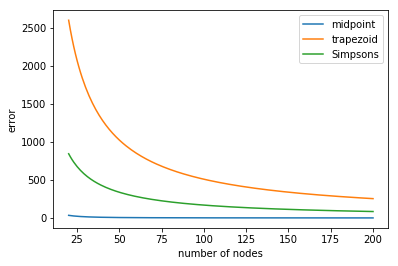

In [24]:
plt.plot(Nvec, np.array(method1),label = "midpoint")
plt.plot(Nvec, np.array(method2),label = "trapezoid")
plt.plot(Nvec, np.array(method3),label = "Simpsons")
plt.legend()
plt.xlabel('number of nodes')
plt.ylabel('error');

We can learn from above that the midpoint method approximates the true value best and fastest as the number of nodes increases.

In [25]:
x_axis = np.linspace(-10, 10, 200)

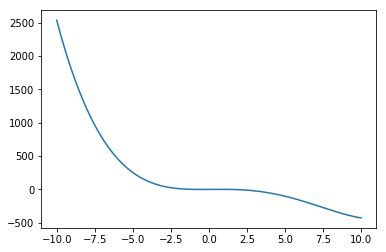

In [162]:
# The graph of original function
plt.plot(x_axis, g(x_axis));

We can see that the shape of original function is much like the nodes-error graph. The reason is that as the slope of the original function become flatter, approximation functions are closer to the true value and behave better.

## ex2.2

In [28]:
from scipy.stats import norm

In [31]:
def normal(mean, sd, N, k):
    a = mean - k*sd
    b = mean + k*sd
    nodes = []
    weights = []
    for i in range(N):
        i += 1
        if i == 1:
            x1 = a
            x2 = a + 2*k*sd/(N-1)
            weight = norm.cdf((x1+x2)/2, loc = mean, scale = sd)
            nodes.append(x1)
            weights.append(weight)

        elif i == N:
            x1 = b - 2*k*sd/(N-1)
            x2 = b
            weight = 1 - norm.cdf((x1+x2)/2, loc = mean, scale = sd)
            nodes.append(x2)
            weights.append(weight)
         
        else:
            xi = a + (i-1)*2*k*sd/(N-1)
            x1 = a + (i-2)*2*k*sd/(N-1)
            x2 = a + i*2*k*sd/(N-1)
            zmax = (x2+xi)/2
            zmin = (x1+xi)/2
            weight = norm.cdf(zmax, loc = mean, scale = sd) - norm.cdf(zmin, loc = mean, scale = sd)
            nodes.append(xi)
            weights.append(weight)
        
    return np.array(nodes), np.array(weights)

In [37]:
result = normal(5, 1.5, 11, 3)
for i in range(11):
    print(f'Node:{result[0][i]}   Weight:{result[1][i]}')
    print('\n')

Node:0.5   Weight:0.0034669738030406686


Node:1.4   Weight:0.014397446759775874


Node:2.3   Weight:0.04894278070604153


Node:3.2   Weight:0.1172529240779014


Node:4.1   Weight:0.19802845246428785


Node:5.0   Weight:0.23582284437790535


Node:5.9   Weight:0.1980284524642878


Node:6.8   Weight:0.11725292407790144


Node:7.7   Weight:0.04894278070604152


Node:8.6   Weight:0.014397446759775945


Node:9.5   Weight:0.0034669738030406183




## ex2.3

In [38]:
import math

In [42]:
def lognormal(mean, sd, N, k):
    nodes, weights = normal(mean, sd, N, k)
    nodes_log = []
    approximation = 0
    for i in range(N):
        node = math.exp(nodes[i])
        nodes_log.append(node)
        approximation += node * weights[i]
    return approximation, nodes_log, weights

In [47]:
result, nodes, weights = lognormal(5, 1.5, 11, 3)

In [48]:
print(f'The approximation result is {result}')

The approximation result is 460.5426522031047


In [49]:
for i in range(11):
    print(f'Node:{nodes[i]}   Weight:{weights[i]}')

Node:1.6487212707001282   Weight:0.0034669738030406686
Node:4.0551999668446745   Weight:0.014397446759775874
Node:9.974182454814718   Weight:0.04894278070604153
Node:24.532530197109352   Weight:0.1172529240779014
Node:60.34028759736195   Weight:0.19802845246428785
Node:148.4131591025766   Weight:0.23582284437790535
Node:365.0374678653289   Weight:0.1980284524642878
Node:897.8472916504176   Weight:0.11725292407790144
Node:2208.347991887209   Weight:0.04894278070604152
Node:5431.659591362978   Weight:0.014397446759775945
Node:13359.726829661873   Weight:0.0034669738030406183


## ex2.4

In [52]:
result, nodes, weights = lognormal(10.5, 0.8, 11, 3)
exact_value = math.exp(10.5 + 0.8**2/2)

In [53]:
print(f'The discrete approximation of the expected value of income is {result}')

The discrete approximation of the expected value of income is 50352.456192765916


In [54]:
print(f'The exact expected value is {exact_value}')

The exact expected value is 50011.087008521754


In [55]:
print(f'The difference is {result-exact_value}')

The difference is 341.36918424416217


The approximation result is 341.37 more than the exact expected value.

## ex3.1

In [56]:
from scipy import optimize

In [85]:
def equation(a, b, N):
    def func(x):
        f_list = []
        for i in range(2*N):
            right = 0
            for n in range(N):
                right += x[n]*x[n+N]**i
            f = (b**(i+1) - a**(i+1))/(i+1) - right
            f_list.append(f)
        return f_list
    return func

In [92]:
def gaussian(a, b, N):
    func = equation(a, b, N)
    weights = [1/N for i in range(N)]
    nodes = [0 for i in range(N)]
    initial = weights + nodes
    sol = optimize.root(func, initial)
    return sol.x

In [93]:
g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
solutions = gaussian(-10, 10, 3)
approximation = 0
for i in range(3):
    approximation += solutions[i]*g(solutions[i+3])
print(f'The result of Gaussian approximation is {approximation}.')

The result of Gaussian approximation is 4373.333334806089.


In [94]:
midpoint = func_1(g, -10, 10, N, 'midpoint')
print(f'The difference between Gaussian result and midpoint method is {abs(midpoint-approximation)}.')

The difference between Gaussian result and midpoint method is 0.34216230609126796.


In [96]:
trapezoid = func_1(g, -10, 10, N, 'trapezoid')
print(f'The difference between Gaussian result and  trapezoid method is {abs(trapezoid-approximation)}.')

The difference between Gaussian result and  trapezoid method is 254.08432519391226.


In [100]:
Simpson = func_1(g, -10, 10, N, 'Simpsons')
print(f'The difference between Gaussian result and  Simpson method is {abs(Simpson-approximation)}.')

The difference between Gaussian result and  Simpson method is 84.46666686057688.


In [101]:
print(f'The difference between true known analytical value and the Gaussian result is {abs(4373.33-approximation)}.')

The difference between true known analytical value and the Gaussian result is 0.0033348060887874453.


## ex3.2

In [103]:
import scipy

In [106]:
scipy_approx, error = scipy.integrate.quad(g, -10, 10)

In [107]:
print(f'The absolute error is {abs(scipy_approx-4373.33)}')

The absolute error is 0.0033333333340124227


## ex4.1

In [109]:
import scipy.stats as sts
import numpy as np

In [113]:
def monte_carlo(g, omega, N):
    x = np.random.uniform(omega[0], omega[1], size = N)
    y = np.random.uniform(omega[2], omega[3], size = N)
    mc_sum = 0
    for i in range(N):
        mc_sum += g(x[i], y[i])
    v = (omega[1] - omega[0]) * (omega[3] - omega[2])
    return v/N*mc_sum

In [155]:
def pi(x, y):
    return x**2 + y**2 <= 1

In [118]:
np.random.seed(25)
n = 1
while True:
    approximation = monte_carlo(pi, [-1,1,-1,1], n)
    if abs(approximation - 3.1415)<1e-4:
        break
    n += 1
print(f'The smallest number is {n}.')

The smallest number is 615.


## ex4.2

In [119]:
import numpy as np

def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

In [120]:
def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [159]:
def equidistributed(n, d, name):
    prime_seq = primes_ascend(d, min_val=2)
    result = np.zeros(d)
    if name == "Weyl":
        result = n*prime_seq**0.5

    if name == "Haber":
        result = n*(n+1)/2*prime_seq**0.5

    if name == "Niederreiter":
        s_array = np.linspace(1, d, d)
        result = n*2**(s_array/(d+1))
    
    if name == "Baker":
        s_array = np.linspace(1, d, d)
        r_array = np.exp(1/s_array)
        result = n*r_array
    
    result = result - np.floor(result)
    return result 

In [134]:
equidistributed(10, 4, 'Weyl')

array([0.14213562, 0.32050808, 0.36067977, 0.45751311])

In [135]:
equidistributed(10, 4, 'Haber')

array([0.78174593, 0.26279442, 0.98373876, 0.51632211])

In [138]:
equidistributed(10, 4, 'Niederreiter')

array([0.48698355, 0.19507911, 0.15716567, 0.41101127])

In [160]:
equidistributed(10, 4, 'Baker')

array([0.18281828, 0.48721271, 0.95612425, 0.84025417])

## ex 4.3

In [154]:
def quasi_monte_carlo(g, omega, N, name):
    mc_sum = 0
    for i in range(N):
        x = (equidistributed(i, 2, name)*(omega[1]-omega[0]) + omega[0])[0]
        y = (equidistributed(i, 2, name)*(omega[3]-omega[2]) + omega[2])[1]
        mc_sum += g(x, y)
    v = (omega[1] - omega[0]) * (omega[3] - omega[2])
    return v/N*mc_sum

In [161]:
for name in ['Weyl', 'Haber', 'Niederreiter', 'Baker']:
    np.random.seed(25)
    n = 1
    while True:
        result = quasi_monte_carlo(pi, [-1,1,-1,1], n, name)
        if round(result, 4) == 3.1415:
            break
        if n>3000:
            break
        n += 1
    if n<=3000:
        print(f'The smallest number for {name} sequence to gain pi approximation is {n}.')
    else:
        print(f'The iteration circle for {name} sequence is more than 3000.')

The smallest number for Weyl sequence to gain pi approximation is 1230.
The smallest number for Haber sequence to gain pi approximation is 2064.
The smallest number for Niederreiter sequence to gain pi approximation is 1845.
The smallest number for Baker sequence to gain pi approximation is 205.
